# Machine Learning Assignment No.5
## _Implement K-Means clustering/ hierarchical clustering on sales_data_sample.csv dataset. Determine the number of clusters using the elbow method._
                                                                                       Author: Akib Faras
                                                                                       BE Computer Engineering

### _Importing Essential Libraries._

In [2]:
# import required libraries for dataframe and visualization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# import required libraries for clustering
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

## 1. Data Pre-processing.

### _Getting the Dataset_

In [7]:
df  = pd.read_csv("sales_data_sample.csv", sep=",", encoding="ISO-8859-1", header=0) # Importing the Dataset
df.head()


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [8]:
df.info() #To get the required information of the dataset
df.columns #TO get number of columns in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [10]:
# shape of df

df.shape

(2823, 25)

In [12]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


### Data Cleansing

In [15]:
# Calculating the Missing Values % contribution in DF

df_null = round(100*(df.isnull().sum())/len(df), 2)
df_null

ORDERNUMBER          0.00
QUANTITYORDERED      0.00
PRICEEACH            0.00
ORDERLINENUMBER      0.00
SALES                0.00
ORDERDATE            0.00
STATUS               0.00
QTR_ID               0.00
MONTH_ID             0.00
YEAR_ID              0.00
PRODUCTLINE          0.00
MSRP                 0.00
PRODUCTCODE          0.00
CUSTOMERNAME         0.00
PHONE                0.00
ADDRESSLINE1         0.00
ADDRESSLINE2        89.30
CITY                 0.00
STATE               52.64
POSTALCODE           2.69
COUNTRY              0.00
TERRITORY           38.04
CONTACTLASTNAME      0.00
CONTACTFIRSTNAME     0.00
DEALSIZE             0.00
dtype: float64

In [16]:
# Droping rows having missing values
df = df.dropna()
df.shape

(147, 25)

In [18]:
# Changing the datatype of Customer Id as per Business understanding

df['ORDERNUMBER'] = df['ORDERNUMBER'].astype(str)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 10 to 2791
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       147 non-null    object 
 1   QUANTITYORDERED   147 non-null    int64  
 2   PRICEEACH         147 non-null    float64
 3   ORDERLINENUMBER   147 non-null    int64  
 4   SALES             147 non-null    float64
 5   ORDERDATE         147 non-null    object 
 6   STATUS            147 non-null    object 
 7   QTR_ID            147 non-null    int64  
 8   MONTH_ID          147 non-null    int64  
 9   YEAR_ID           147 non-null    int64  
 10  PRODUCTLINE       147 non-null    object 
 11  MSRP              147 non-null    int64  
 12  PRODUCTCODE       147 non-null    object 
 13  CUSTOMERNAME      147 non-null    object 
 14  PHONE             147 non-null    object 
 15  ADDRESSLINE1      147 non-null    object 
 16  ADDRESSLINE2      147 non-null    object 


### Data Preparation

#### We are going to analysis the Customers based on below 3 factors:
##### R (Recency): Number of days since last purchase
##### F (Frequency): Number of tracsactions
##### M (Monetary): Total amount of transactions (revenue contributed)

In [20]:
# New Attribute : Monetary


df['Amount'] = df['QUANTITYORDERED']*df['PRICEEACH']
rfm_m = df.groupby('ORDERNUMBER')['Amount'].sum()
rfm_m = rfm_m.reset_index()
rfm_m.head()

,ORDERNUMBER,Amount
0,10120,43517.99
1,10125,6600.00
2,10139,23038.57
3,10148,38062.52
4,10169,35656.60


In [21]:
# New Attribute : Frequency

rfm_f = df.groupby('ORDERNUMBER')['ORDERLINENUMBER'].count()
rfm_f = rfm_f.reset_index()
rfm_f.columns = ['ORDERNUMBER', 'Frequency']
rfm_f.head()

,ORDERNUMBER,Frequency
0,10120,15
1,10125,2
2,10139,8
3,10148,14
4,10169,13


In [22]:
# Merging the two dfs

rfm = pd.merge(rfm_m, rfm_f, on='ORDERNUMBER', how='inner')
rfm.head()

,ORDERNUMBER,Amount,Frequency
0,10120,43517.99,15
1,10125,6600.00,2
2,10139,23038.57,8
3,10148,38062.52,14
4,10169,35656.60,13


In [26]:
# New Attribute : Recency

# Convert to datetime to proper datatype

df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'],format='%m/%d/%Y %H:%M')

In [27]:
# Compute the maximum date to know the last transaction date

max_date = max(df['ORDERDATE'])
max_date

Timestamp('2005-05-29 00:00:00')

In [28]:
# Compute the difference between max date and transaction date
df['Diff'] = max_date - df['ORDERDATE']
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,Amount,Diff
10,10223,37,100.00,1,3965.66,2004-02-20,Shipped,1,2,2004,...,Melbourne,Victoria,3004,Australia,APAC,Ferguson,Peter,Medium,3700.0,464 days
21,10361,20,72.55,13,1451.00,2004-12-17,Shipped,4,12,2004,...,Chatswood,NSW,2067,Australia,APAC,Huxley,Adrian,Small,1451.0,163 days
40,10270,21,100.00,9,4905.39,2004-07-19,Shipped,3,7,2004,...,Chatswood,NSW,2067,Australia,APAC,Huxley,Adrian,Medium,2100.0,314 days
47,10347,30,100.00,1,3944.70,2004-11-29,Shipped,4,11,2004,...,Melbourne,Victoria,3004,Australia,APAC,Ferguson,Peter,Medium,3000.0,181 days
51,10391,24,100.00,4,2416.56,2005-03-09,Shipped,1,3,2005,...,North Sydney,NSW,2060,Australia,APAC,O'Hara,Anna,Small,2400.0,81 days


In [29]:
# Compute last transaction date to get the recency of customers

rfm_p = df.groupby('ORDERNUMBER')['Diff'].min()
rfm_p = rfm_p.reset_index()
rfm_p.head()

,ORDERNUMBER,Diff
0,10120,761 days
1,10125,739 days
2,10139,683 days
3,10148,626 days
4,10169,572 days


In [30]:
# Extract number of days only

rfm_p['Diff'] = rfm_p['Diff'].dt.days
rfm_p.head()

,ORDERNUMBER,Diff
0,10120,761
1,10125,739
2,10139,683
3,10148,626
4,10169,572


In [31]:
# Merge tha dataframes to get the final RFM dataframe

rfm = pd.merge(rfm, rfm_p, on='ORDERNUMBER', how='inner')
rfm.columns = ['ORDERNUMBER', 'Amount', 'Frequency', 'Recency']
rfm.head()

,ORDERNUMBER,Amount,Frequency,Recency
0,10120,43517.99,15,761
1,10125,6600.00,2,739
2,10139,23038.57,8,683
3,10148,38062.52,14,626
4,10169,35656.60,13,572


#### There are 2 types of outliers and we will treat outliers as it can skew our dataset
#####  1.Statistical
#####  2.Domain specific

Text(0.5, 0, 'Attributes')

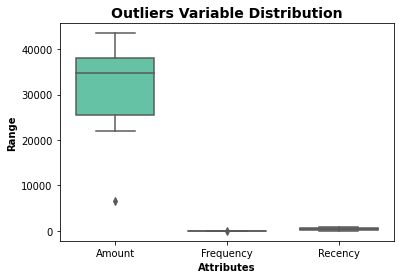

In [32]:
attributes = ['Amount','Frequency','Recency']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = rfm[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

In [33]:
# Removing (statistical) outliers for Amount
Q1 = rfm.Amount.quantile(0.05)
Q3 = rfm.Amount.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Amount >= Q1 - 1.5*IQR) & (rfm.Amount <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Recency
Q1 = rfm.Recency.quantile(0.05)
Q3 = rfm.Recency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Recency >= Q1 - 1.5*IQR) & (rfm.Recency <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Frequency
Q1 = rfm.Frequency.quantile(0.05)
Q3 = rfm.Frequency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Frequency >= Q1 - 1.5*IQR) & (rfm.Frequency <= Q3 + 1.5*IQR)]

#### Rescaling the Attributes
##### It is extremely important to rescale the variables so that they have a comparable scale.| There are two common ways of rescaling:

###### Min-Max scaling
###### Standardisation (mean-0, sigma-1)
###### Here, we will use Standardisation Scaling.



In [34]:
# Rescaling the attributes

rfm_df = rfm[['Amount', 'Frequency', 'Recency']]

# Instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(13, 3)

In [35]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Amount', 'Frequency', 'Recency']
rfm_df_scaled.head()

,Amount,Frequency,Recency
0,1.123902,1.077089,1.463557
1,-2.553627,-2.715162,1.379741
2,-0.916124,-0.964892,1.166391
3,0.580464,0.785377,0.949231
4,0.340802,0.493666,0.743501


## 2.Building the Model

### K-Means Clustering

In [36]:
# k-means with some arbitrary k

kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=4)

In [37]:
kmeans.labels_

array([1, 3, 3, 1, 1, 1, 2, 2, 2, 2, 0, 0, 2])

#### Finding the Optimal Number of Clusters
##### Elbow Curve to get the right number of Clusters

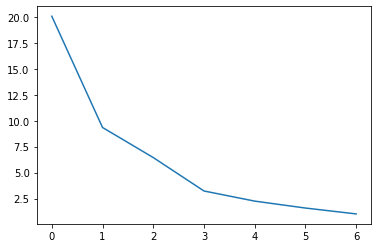

In [38]:
# Elbow-curve/SSD

ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(ssd)

#### Silhouette Analysis
##### silhouette score= 
### p−q/max(p,q)
 
p  is the mean distance to the points in the nearest cluster that the data point is not a part of

q  is the mean intra-cluster distance to all the points in its own cluster.

The value of the silhouette score range lies between -1 to 1.

A score closer to 1 indicates that the data point is very similar to other data points in the cluster,

A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [39]:
# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.48247844119814454
For n_clusters=3, the silhouette score is 0.4552113527787392
For n_clusters=4, the silhouette score is 0.45157643989788243
For n_clusters=5, the silhouette score is 0.4297019475168945
For n_clusters=6, the silhouette score is 0.35225354874029596
For n_clusters=7, the silhouette score is 0.2640348844229173
For n_clusters=8, the silhouette score is 0.2817636442685936


In [41]:
# Final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=3)

In [42]:
 kmeans.labels_

array([0, 2, 2, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [43]:
# assign the label
rfm['ORDERNUMBER'] = kmeans.labels_
rfm.head()

,ORDERNUMBER,Amount,Frequency,Recency
0,0,43517.99,15,761
1,2,6600.00,2,739
2,2,23038.57,8,683
3,0,38062.52,14,626
4,0,35656.60,13,572


<AxesSubplot: xlabel='ORDERNUMBER', ylabel='Amount'>

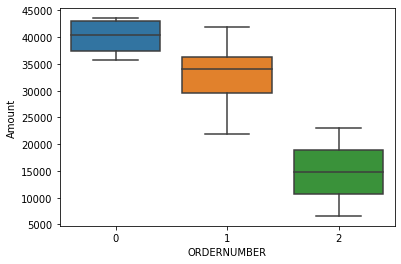

In [45]:
# Box plot to visualize Cluster Id vs Frequency

sns.boxplot(x='# Box plot to visualize Cluster Id vs Frequency

sns.boxplot(x='Cluster_Id', y='Frequency', data=rfm)', y='Amount', data=rfm)

<AxesSubplot: xlabel='ORDERNUMBER', ylabel='Frequency'>

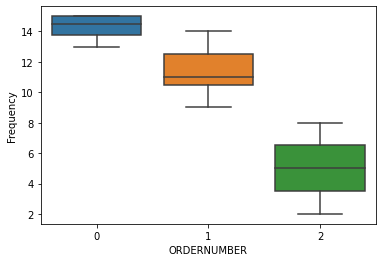

In [46]:
# Box plot to visualize Cluster Id vs Frequency

sns.boxplot(x='ORDERNUMBER', y='Frequency', data=rfm)

<AxesSubplot: xlabel='ORDERNUMBER', ylabel='Recency'>

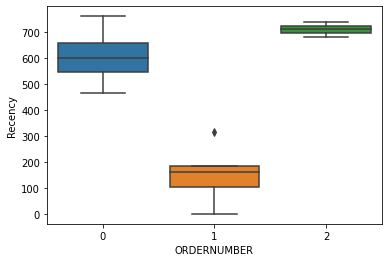

In [47]:
# Box plot to visualize Cluster Id vs Recency

sns.boxplot(x='ORDERNUMBER', y='Recency', data=rfm)

### Hierarchical Clustering

#### Single Linkage:

##### In single linkage hierarchical clustering, the distance between two clusters is defined as the shortest distance between two points in each cluster. For example, the distance between clusters “r” and “s” to the left is equal to the length of the arrow between their two closest points.

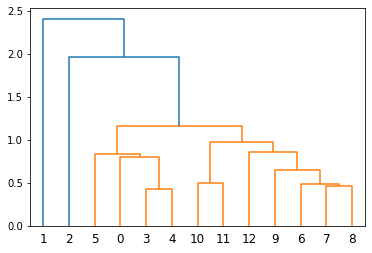

In [48]:
# Single linkage: 

mergings = linkage(rfm_df_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

#### Complete Linkage

##### In complete linkage hierarchical clustering, the distance between two clusters is defined as the longest distance between two points in each cluster. For example, the distance between clusters “r” and “s” to the left is equal to the length of the arrow between their two furthest points.

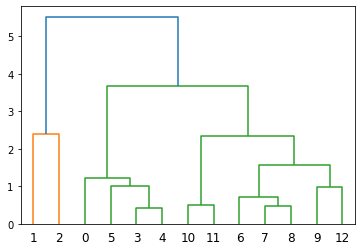

In [49]:
# Complete linkage

mergings = linkage(rfm_df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

#### Average Linkage:

##### In average linkage hierarchical clustering, the distance between two clusters is defined as the average distance between each point in one cluster to every point in the other cluster. For example, the distance between clusters “r” and “s” to the left is equal to the average length each arrow between connecting the points of one cluster to the other.

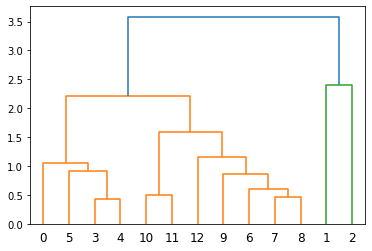

In [50]:
# Average linkage

mergings = linkage(rfm_df_scaled, method="average", metric='euclidean')
dendrogram(mergings)
plt.show()

#### Cutting the Dendrogram based on K

In [51]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [53]:
# Assign cluster labels

rfm['Cluster_Labels'] = cluster_labels
rfm.head()


,ORDERNUMBER,Amount,Frequency,Recency,Cluster_Labels
0,0,43517.99,15,761,0
1,2,6600.00,2,739,1
2,2,23038.57,8,683,2
3,0,38062.52,14,626,0
4,0,35656.60,13,572,0


<AxesSubplot: xlabel='Cluster_Labels', ylabel='Amount'>

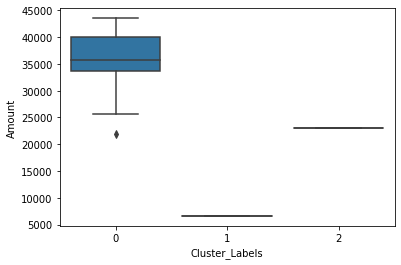

In [54]:
# Plot Cluster Id vs Amount

sns.boxplot(x='Cluster_Labels', y='Amount', data=rfm)

<AxesSubplot: xlabel='Cluster_Labels', ylabel='Frequency'>

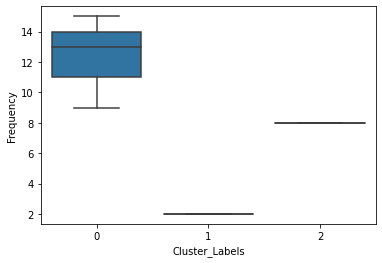

In [55]:
# Plot Cluster Id vs Frequency

sns.boxplot(x='Cluster_Labels', y='Frequency', data=rfm)

<AxesSubplot: xlabel='Cluster_Labels', ylabel='Recency'>

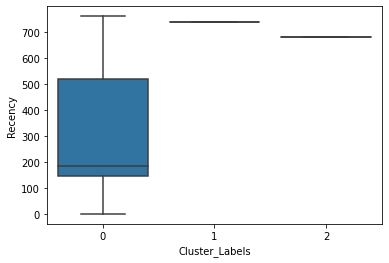

In [56]:
# Plot Cluster Id vs Recency

sns.boxplot(x='Cluster_Labels', y='Recency', data=rfm)